<a href="https://colab.research.google.com/github/Aryamaan777/RLForexTrader/blob/main/ForexClean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEPS TO RUN

# After !pip install keras-rl2 (from https://github.com/wau/keras-rl2)
# Click the .. Directory above data
# Replace core.py in usr/local/lib/python3.7/distpackages/rl with your saved core.py file.
# Replace usr/local/lib/python3.7/distpackages/rl/agents/dqn.py with the downloaded dqn.py code.
# Copy process_data.py, util.py from the saved RLForexTrader Directory into the content Directory.
# Copy your saved TraderEnv.py file into the content Directory.

In [ ]:
# Use this if you want to use the Original Code Repository
# !git clone https://github.com/CodeLogist/RL-Forex-trader-LSTM.git

Cloning into 'RL-Forex-trader-LSTM'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 107 (delta 47), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (107/107), 227.58 KiB | 9.10 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [ ]:
!pip install quantstats

     |████████████████████████████████| 6.3MB 16.3MB/s 
  Created wheel for quantstats: filename=QuantStats-0.0.34-py2.py3-none-any.whl size=37838 sha256=38acf32c7aa0413b3f3c7798d54543da0348155489a52185ffcc3cceca9aa199
  Stored in directory: /root/.cache/pip/wheels/33/e7/ca/ae9743f69d64c75b5cec0c302e8ddeff59fcd5494887cac5a4
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=f380d0018a32f932d500ec6b37af05af79a9c92f7bddacd7eba2b83a5044b086
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built quantstats yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install keras-rl2

     |████████████████████████████████| 61kB 4.1MB/s 


In [ ]:
def datetime_formater(a):
    x,y=a
    if y==0:
        y='000000'
    return str(x)+' '+str(y)

In [ ]:
# Provide the Location to your Dataset Here

data=pd.read_csv("/content/drive/MyDrive/PriceOnly_EURJPY-2020-11-13.csv", index_col=False)
data.columns=['Date','Time','open','high','low','close']
data['DateTime']=pd.to_datetime(data[['Date','Time']].apply(datetime_formater,axis=1),format='%Y%m%d %H%M%S')
data.set_index('DateTime',inplace=True)
# data.drop(['Date','Time','Open','High','Low'],axis=1,inplace=True)
# data.drop(['Date','Time'],axis=1,inplace=True)
data.head()

,Date,Time,open,high,low,close
DateTime,,,,,,
2015-10-20 21:01:00,20151020,210100,135.941,135.944,135.914,135.941
2015-10-20 21:02:00,20151020,210200,135.942,135.950,135.939,135.939
2015-10-20 21:03:00,20151020,210300,135.942,135.947,135.931,135.943
2015-10-20 21:04:00,20151020,210400,135.947,135.955,135.947,135.950
2015-10-20 21:05:00,20151020,210500,135.950,135.951,135.942,135.949


In [ ]:
# 0.01 in Y 5$
# 135.941 -> 135.950 | 0.009 *100 *5

In [ ]:
# Remove Duplicated Indices
data = data[~data.index.duplicated(keep='first')]

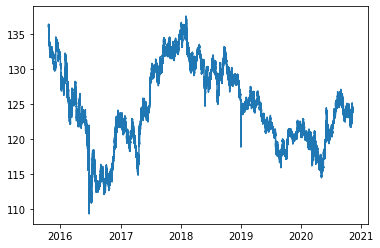

In [ ]:
# Plot the Values of the "Close" Column

import matplotlib.pyplot as plt
plt.plot(data["close"])

In [ ]:
# Split into Training and Testing Data (80%)
l=len(data)
train=data[:int(l*0.8)]
test=data[int(l*0.8):]

In [ ]:
train.tail()

,open,high,low,close
DateTime,,,,
2019-11-05 22:29:00,120.864,120.864,120.857,120.858
2019-11-05 22:31:00,120.862,120.880,120.862,120.873
2019-11-05 22:32:00,120.877,120.878,120.872,120.874
2019-11-05 22:33:00,120.874,120.876,120.873,120.873
2019-11-05 22:34:00,120.873,120.874,120.872,120.872


In [ ]:
test.head()

,open,high,low,close
DateTime,,,,
2019-11-05 22:35:00,120.873,120.875,120.872,120.875
2019-11-05 22:36:00,120.875,120.877,120.874,120.875
2019-11-05 22:37:00,120.875,120.875,120.874,120.875
2019-11-05 22:38:00,120.875,120.879,120.875,120.877
2019-11-05 22:39:00,120.878,120.878,120.876,120.878


In [ ]:
test.tail()

,open,high,low,close
DateTime,,,,
2020-11-13 08:53:00,124.209,124.209,124.193,124.202
2020-11-13 08:54:00,124.201,124.207,124.195,124.205
2020-11-13 08:55:00,124.204,124.216,124.193,124.193
2020-11-13 08:56:00,124.192,124.192,124.175,124.184
2020-11-13 08:57:00,124.183,124.184,124.152,124.152


In [ ]:
len(test)

337715

In [ ]:
# Make a few Directories for Storing some Data

import os
os.makedirs("/content/data")
os.makedirs("/content/data/train")
os.makedirs("/content/data/test")
os.makedirs("/content/info")

In [ ]:
# Save the Train and Test Set

train.to_csv("/content/data/train/train.csv")
test.to_csv("/content/data/test/test.csv")

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, LSTM, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Input, Reshape
from keras.layers import *
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory

# trader environment
from TraderEnv import OhlcvEnv
# custom normalizer
from util import NormalizerProcessor

import quantstats as qs
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Uncomment the Create Model function for the model you want to use


def Inception_A(layer_in, c7):
  branch1x1_1 = Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
  branch1x1 = BatchNormalization()(branch1x1_1)
  branch1x1 = ReLU()(branch1x1)
  
  branch5x5_1 = Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(layer_in)
  branch5x5 = BatchNormalization()(branch5x5_1)
  branch5x5 = ReLU()(branch5x5)
  branch5x5 = Conv1D(c7, kernel_size=5, padding='same', use_bias=False)(branch5x5)
  branch5x5 = BatchNormalization()(branch5x5)
  branch5x5 = ReLU()(branch5x5)  
  
  branch3x3_1 = Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(layer_in)
  branch3x3 = BatchNormalization()(branch3x3_1)
  branch3x3 = ReLU()(branch3x3)
  branch3x3 = Conv1D(c7, kernel_size=3, padding='same', use_bias=False)(branch3x3)
  branch3x3 = BatchNormalization()(branch3x3)
  branch3x3 = ReLU()(branch3x3)
  branch3x3 = Conv1D(c7, kernel_size=3, padding='same', use_bias=False)(branch3x3)
  branch3x3 = BatchNormalization()(branch3x3)
  branch3x3 = ReLU()(branch3x3) 
  

  branch_pool = AveragePooling1D(pool_size=(3), strides=1, padding='same')(layer_in)
  branch_pool = Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(branch_pool)
  branch_pool = BatchNormalization()(branch_pool)
  branch_pool = ReLU()(branch_pool)
  outputs = Concatenate(axis=-1)([branch1x1, branch5x5, branch3x3, branch_pool])
  return outputs


def Inception_B(layer_in, c7):
  branch3x3 = Conv1D(c7, kernel_size=3, padding="same", strides=2, use_bias=False)(layer_in)
  branch3x3 = BatchNormalization()(branch3x3)
  branch3x3 = ReLU()(branch3x3)  
  
  branch3x3dbl = Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
  branch3x3dbl = BatchNormalization()(branch3x3dbl)
  branch3x3dbl = ReLU()(branch3x3dbl)  
  branch3x3dbl = Conv1D(c7, kernel_size=3, padding="same", use_bias=False)(branch3x3dbl)  
  branch3x3dbl = BatchNormalization()(branch3x3dbl)
  branch3x3dbl = ReLU()(branch3x3dbl)  
  branch3x3dbl = Conv1D(c7, kernel_size=3, padding="same", strides=2, use_bias=False)(branch3x3dbl)    
  branch3x3dbl = BatchNormalization()(branch3x3dbl)
  branch3x3dbl = ReLU()(branch3x3dbl)   
  
  branch_pool = MaxPooling1D(pool_size=3, strides=2, padding="same")(layer_in)
  
  outputs = Concatenate(axis=-1)([branch3x3, branch3x3dbl, branch_pool])
  return outputs


def Inception_C(layer_in, c7):
  branch1x1_1 = Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
  branch1x1 = BatchNormalization()(branch1x1_1)
  branch1x1 = ReLU()(branch1x1)   
  
  branch7x7_1 = Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
  branch7x7 = BatchNormalization()(branch7x7_1)
  branch7x7 = ReLU()(branch7x7)   
  branch7x7 = Conv1D(c7, kernel_size=(7), padding="same", use_bias=False)(branch7x7)
  branch7x7 = BatchNormalization()(branch7x7)
  branch7x7 = ReLU()(branch7x7)  
  branch7x7 = Conv1D(c7, kernel_size=(1), padding="same", use_bias=False)(branch7x7)  
  branch7x7 = BatchNormalization()(branch7x7)
  branch7x7 = ReLU()(branch7x7)   

  branch7x7dbl_1 = Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)  
  branch7x7dbl = BatchNormalization()(branch7x7dbl_1)
  branch7x7dbl = ReLU()(branch7x7dbl)  
  branch7x7dbl = Conv1D(c7, kernel_size=(7), padding="same", use_bias=False)(branch7x7dbl)  
  branch7x7dbl = BatchNormalization()(branch7x7dbl)
  branch7x7dbl = ReLU()(branch7x7dbl) 
  branch7x7dbl = Conv1D(c7, kernel_size=(1), padding="same", use_bias=False)(branch7x7dbl)  
  branch7x7dbl = BatchNormalization()(branch7x7dbl)
  branch7x7dbl = ReLU()(branch7x7dbl)  
  branch7x7dbl = Conv1D(c7, kernel_size=(7), padding="same", use_bias=False)(branch7x7dbl)  
  branch7x7dbl = BatchNormalization()(branch7x7dbl)
  branch7x7dbl = ReLU()(branch7x7dbl)  
  branch7x7dbl = Conv1D(c7, kernel_size=(1), padding="same", use_bias=False)(branch7x7dbl)  
  branch7x7dbl = BatchNormalization()(branch7x7dbl)
  branch7x7dbl = ReLU()(branch7x7dbl)  
  
  branch_pool = AveragePooling1D(pool_size=3, strides=1, padding='same')(layer_in)
  branch_pool = Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(branch_pool)
  branch_pool = BatchNormalization()(branch_pool)
  branch_pool = ReLU()(branch_pool)  
  
  outputs = Concatenate(axis=-1)([branch1x1, branch7x7, branch7x7dbl, branch_pool])
  return outputs

# CNN + LSTM

# def create_model(shape, nb_actions):
#   in_seq = Input(shape=shape)

#   x = Inception_A(in_seq, 32)
#   x = Inception_A(x, 32)
#   x = Inception_B(x, 32)
#   x = Inception_B(x, 32)
#   x = Inception_C(x, 32)
#   x = Inception_C(x, 32)    
          
#   x = LSTM(128, return_sequences=True)(x)
#   x = LSTM(128, return_sequences=True)(x)
#   x = LSTM(64, return_sequences=True)(x) 
          
#   avg_pool = GlobalAveragePooling1D()(x)
#   max_pool = GlobalMaxPooling1D()(x)
#   conc = concatenate([avg_pool, max_pool])
#   conc = Dense(64, activation="relu")(conc)
#   out = Dense(nb_actions, activation="softmax")(conc)      

#   model = Model(inputs=in_seq, outputs=out)
#   model.compile(optimizer="adam", loss="mse")
#   model.call = tf.function(model.call)
#   return model

# LSTM

# def create_model(shape, nb_actions):
#     model = Sequential()
#     model.add(LSTM(64, input_shape=shape, return_sequences=True))
#     model.add(LSTM(64))
#     model.add(Dense(32))
#     model.add(Activation('relu'))
#     model.add(Dense(nb_actions, activation='softmax'))
#     return model

# BiDirectional LSTM

# def create_model(shape, nb_actions):
#   in_seq = Input(shape = shape)
      
#   x = Bidirectional(LSTM(128, return_sequences=True))(in_seq)
#   x = Bidirectional(LSTM(128, return_sequences=True))(x)
#   x = Bidirectional(LSTM(64, return_sequences=True))(x) 
          
#   avg_pool = GlobalAveragePooling1D()(x)
#   max_pool = GlobalMaxPooling1D()(x)
#   conc = concatenate([avg_pool, max_pool])
#   conc = Dense(64, activation="relu")(conc)
#   out = Dense(nb_actions, activation="linear")(conc)
#   #out=Reshape([nb_actions])(out)  

#   model = Model(inputs=in_seq, outputs=out)   
#   return model

# CNN + BiDirectional LSTM

def create_model(shape, nb_actions):
  in_seq = Input(shape=shape)

  x = Inception_A(in_seq, 32)
  x = Inception_A(x, 32)
  x = Inception_B(x, 32)
  x = Inception_B(x, 32)
  x = Inception_C(x, 32)
  x = Inception_C(x, 32)    
          
  x = Bidirectional(LSTM(128, return_sequences=True))(x)
  x = Bidirectional(LSTM(128, return_sequences=True))(x)
  x = Bidirectional(LSTM(64, return_sequences=True))(x) 
          
  avg_pool = GlobalAveragePooling1D()(x)
  max_pool = GlobalMaxPooling1D()(x)
  conc = concatenate([avg_pool, max_pool])
  conc = Dense(64, activation="relu")(conc)
  out = Dense(nb_actions, activation="softmax")(conc)      

  model = Model(inputs=in_seq, outputs=out)
  return model

In [ ]:
from keras.models import load_model

ENV_NAME = 'OHLCV-v0'
TIME_STEP = 30 #Update TIME_STEP in TraderEnv.py as well.
PATH_TRAIN = "./data/train/"
PATH_TEST = "./data/test/"
env = OhlcvEnv(TIME_STEP, path=PATH_TRAIN)
env_test = OhlcvEnv(TIME_STEP, path=PATH_TEST)

# random seed
np.random.seed(123)
env.seed(123)

# create_model
nb_actions = env.action_space.n
model = create_model(shape=env.shape, nb_actions=nb_actions)
# model=load_model("sample_model.h5")                               # Uncomment if you want to use a saved Model
print(model.summary())


# create memory
memory = SequentialMemory(limit=50000, window_length=TIME_STEP)

# create policy
policy = EpsGreedyQPolicy()# policy = BoltzmannQPolicy()

# create agent
# you can specify the dueling_type to one of {'avg','max','naive'}
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=200,
               enable_dueling_network=True, dueling_type='avg', target_model_update=1e-2, policy=policy,
               processor=NormalizerProcessor())
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 30, 11)]     0                                            
__________________________________________________________________________________________________
conv1d_45 (Conv1D)              (None, 30, 32)       352         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 30, 32)       128         conv1d_45[0][0]                  
__________________________________________________________________________________________________
re_lu_45 (ReLU)                 (None, 30, 32)       0           batch_normalization_45[0][0]     
____________________________________________________________________________________________

In [ ]:
print(env.shape) # Shape of the Environment

(30, 11)


In [ ]:
# for i in range(2): # For loop is the number of Episodes you want to train for
info_train=dqn.fit(env, nb_steps=1000, nb_max_episode_steps=1000, visualize=False, verbose=2, data=data)

Training for 1000 steps ...
start episode ... train.csv at 0
Tick: 100/ Portfolio (USD): 984.3167925106804
Long: 0/ Short: 3
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Tick: 200/ Portfolio (USD): 862.347874895598
Long: 0/ Short: 7
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Tick: 300/ Portfolio (USD): 787.9453674043532
Long: 0/ Short: 9
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1

In [ ]:
# Saves the List of Trade Class Objects to Calculate Extra Metrics

trades=np.array(info_train["trades"])
np.savez("tradesFile",trades)

In [ ]:
# Mulitply Profit Values by 100*5 to consider each movement of 0.01 as 5$

text=[]
for c in info_train["profits"]:
  text.append(c*100*5)

In [ ]:
text

[12.000000000014666,
 1.4999999999929514,
 6.500000000002615,
 -2.0000000000095497,
 -2.0000000000095497,
 -1.0000000000047748,
 40.99999999999682,
 33.00000000000125,
 -1.5000000000071623,
 7.000000000005002,
 -16.999999999995907,
 10.99999999999568,
 -13.999999999995794,
 -16.49999999999352,
 3.0000000000001137,
 11.499999999998067,
 -2.4999999999977263,
 2.0000000000095497,
 15.999999999991132,
 -0.5000000000023874,
 13.999999999995794,
 -4.500000000007276,
 -49.49999999999477,
 -79.50000000001012,
 79.00000000000773,
 -18.49999999998886,
 -42.00000000000159,
 43.99999999999693,
 16.000000000005343,
 9.499999999988518,
 -3.0000000000001137,
 -38.99999999998727,
 -70.49999999999557,
 89.9999999999892,
 -16.49999999999352,
 24.500000000003297,
 -36.49999999998954,
 -24.999999999991473,
 -10.99999999999568,
 24.00000000001512,
 -13.999999999995794,
 0.5000000000023874,
 15.000000000000568,
 -17.000000000010118,
 10.99999999999568,
 -20.999999999986585,
 -7.50000000000739,
 -15.00000000

In [ ]:
# Print Metrics for Training Data

start_index=TIME_STEP
end_index=len(info_train["history"])

values=[]
for i in range(len(info_train["history"])):
  values.append(info_train["history"][i][5])

qs.extend_pandas()

end_index=len(values)

net_worth = pd.Series(values, index=data.index[start_index+1:end_index+TIME_STEP+1])
# returns = net_worth.pct_change().iloc[1:]
returns=net_worth
returns=returns.fillna(0)
# lot_size=100000
lot_size=1
pip=(100*5)*lot_size
# pip=1
returns=returns

total_profit=(returns.sum())*pip
avg_profit=returns.avg_win()*pip
profit_factor=returns.profit_factor()
r_squared=returns.r_squared(data['close'])
sharpe_ratio=returns.sharpe()
sortino_ratio=returns.sortino()
if((data.index[end_index-1]-data.index[start_index+1]).days<1):
  avg_trades_per_day=len(returns[returns!=0])
else:
  avg_trades_per_day=len(returns[returns!=0])/(data.index[end_index-1]-data.index[start_index+1]).days
drawdown=returns.max_drawdown()*100
largest_loss=min(returns)*pip
largest_win=max(returns)*pip
months=(data.index[end_index-1]-data.index[start_index+1]).days//30
if((data.index[end_index-1]-data.index[start_index+1]).days%30 != 0):
  months+=1
if((data.index[end_index-1]-data.index[start_index+1]).days/30 == 0):
  months+=1
profit_per_month=((returns[returns>0].sum()+returns[returns<0].sum())/(months))*pip
# winning_trades=(len(returns[returns>0])/len(returns[returns<0]))*100
winning_trades=len(returns[returns>0])
losing_trades=len(returns[returns<0])

print("---------------------REQUIRED METRICS--------------------")

# print("METRIC: AVERAGE NUMBER OF TRADES PER DAY    TARGET: 200.0")
print("MODEL NAME: BiDirectional LSTM")
print("NUMBER OF STEPS: ", len(values))
print("START DATE: ",data.index[start_index])
print("END DATE: ",data.index[end_index+TIME_STEP])
print()
print("TOTAL PROFIT: ",total_profit)
print("AVERAGE PROFIT: ",avg_profit)
print("PROFIT FACTOR: ",profit_factor)
print("R SQAURED: ",r_squared*100)
print("SHARPE RATIO: ",sharpe_ratio)
print("SORTINO RATIO: ",sortino_ratio)
print("AVGERAGE NUMBER OF TRADES PER DAY: ",avg_trades_per_day)
print("DRAWDOWN: ",drawdown)
print("LARGEST LOSS: ",largest_loss)
print("LARGEST WIN: ",largest_win)
print("PROFIT PER MONTH: ",profit_per_month)
print("WINNING TRADES: ", winning_trades)
print("LOSING TRADES: ",losing_trades)
print()

# x=50
qs.reports.full(returns)

---------------------REQUIRED METRICS--------------------
MODEL NAME: BiDirectional LSTM
NUMBER OF STEPS:  500
START DATE:  2015-10-20 21:31:00
END DATE:  2015-10-21 06:37:00

TOTAL PROFIT:  134.00000000001455
AVERAGE PROFIT:  22.722222222223348
PROFIT FACTOR:  2.900709219858482
R SQAURED:  1.1071115300104277
SHARPE RATIO:  0.9555717551290825
SORTINO RATIO:  2.1068716511710597
AVGERAGE NUMBER OF TRADES PER DAY:  14
DRAWDOWN:  -9.11089999999849
LARGEST LOSS:  -40.49999999999443
LARGEST WIN:  61.500000000009436
PROFIT PER MONTH:  134.00000000001455
WINNING TRADES:  9
LOSING TRADES:  5

[Performance Metrics]



ZeroDivisionError: ignored

In [ ]:
# Save the Model
model.save("sample_model.h5")

In [ ]:
# Test the model Performance
info = dqn.test(env, nb_episodes=1, visualize=True, nb_max_episode_steps=3900, data=data)

YYYYYYYYYYYYYYYYYY 0.1 2
Testing for 1 episodes ...
start episode ... train.csv at 0
Tick: 100/ Portfolio (USD): 999.3456476544627
Long: 0/ Short: 0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tick: 200/ Portfolio (USD): 1000.3818406178508
Long: 0/ Short: 0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tick: 300/ Portfolio (USD): 1001.1608225619584
Long: 0/ Short: 0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

---------------------REQUIRED METRICS--------------------
NUMBER OF STEPS:  3900
START DATE:  2015-10-20 21:31:00
END DATE:  2015-10-25 21:41:00

AVERAGE PROFIT:  8.025547445255624
PROFIT FACTOR:  1.194459532862619
R SQAURED:  0.0041488358326306415
SHARPE RATIO:  0.19773262404679523
SORTINO RATIO:  0.24118618490785454
AVGERAGE NUMBER OF TRADES PER DAY:  59.75
DRAWDOWN:  -35.662023420801056
LARGEST LOSS:  -106.00000000000165
LARGEST WIN:  43.00000000000637
PROFIT PER MONTH:  179.00000000003757
WINNING TRADES:  137
LOSING TRADES:  102

[Performance Metrics]

                           Strategy
-------------------------  --------------
Start Period               2015-10-20
End Period                 2015-10-25
Risk-Free Rate             0.0%
Time in Market             7.0%

Cumulative Return          27.78%
CAGR%                      5927559047.58%

Sharpe                     0.2
Sortino                    0.24
Sortino/√2                 0.17

Max Drawdown               -35.66%
Longest DD

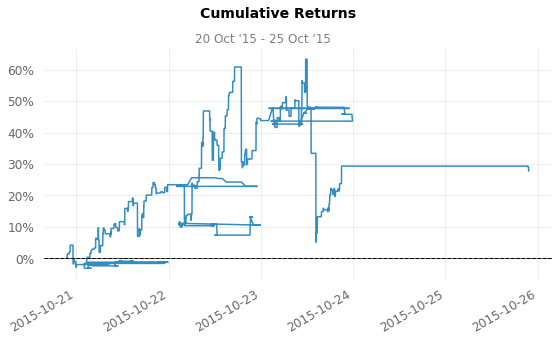

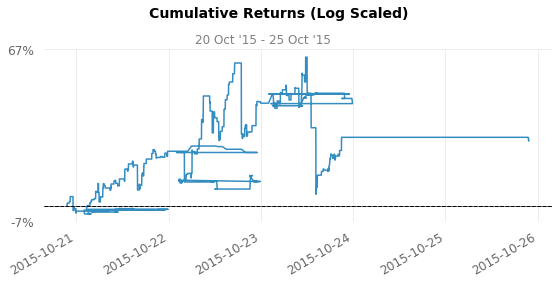

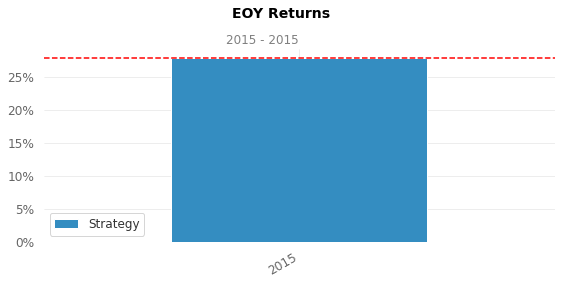

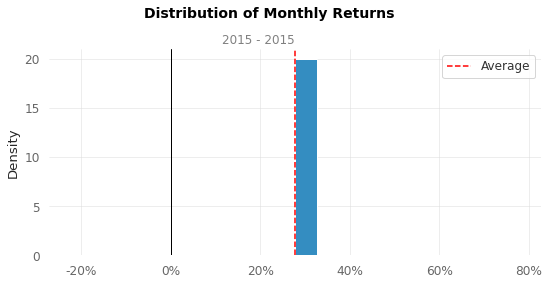

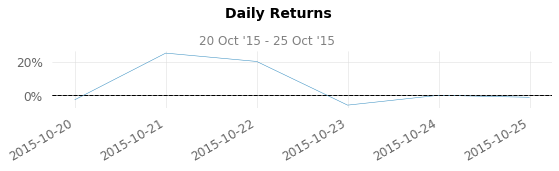

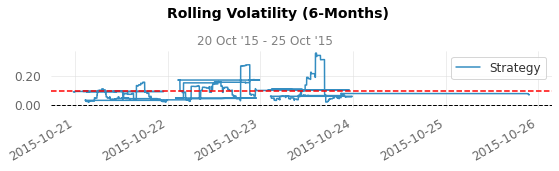

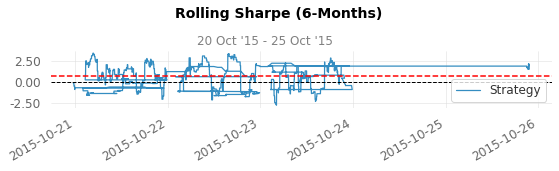

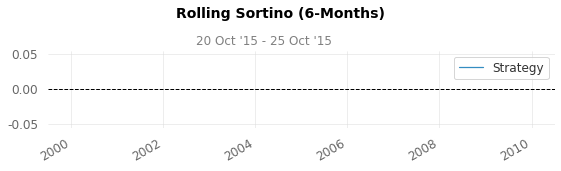

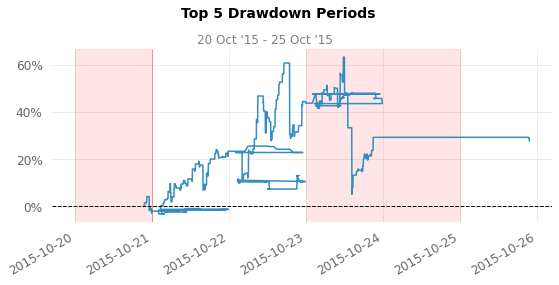

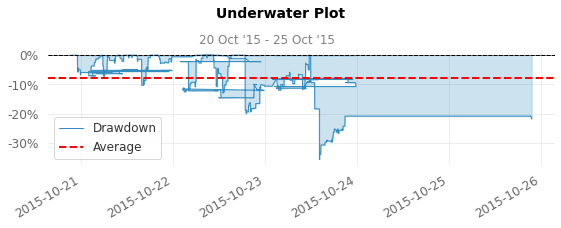

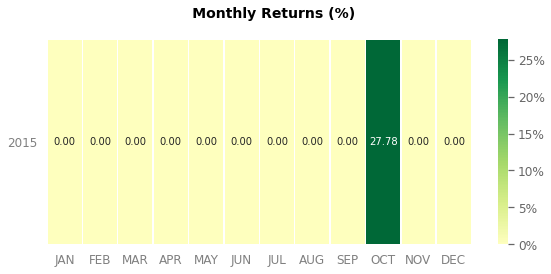

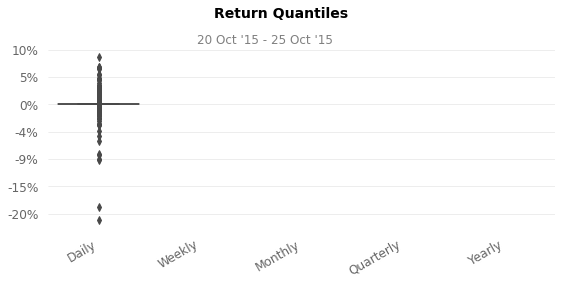

In [ ]:
# Print the Metrics for Testing Data

start_index=TIME_STEP
end_index=len(info["history"])

values=[]
for i in range(len(info["history"])):
  values.append(info["history"][i][5])

qs.extend_pandas()

end_index=len(values)

net_worth = pd.Series(values, index=data.index[start_index+1:end_index+TIME_STEP+1])
# returns = net_worth.pct_change().iloc[1:]
returns=net_worth
returns=returns.fillna(0)
# lot_size=100000
lot_size=1
pip=(100*5)*lot_size
# pip=1
returns=returns


avg_profit=returns.avg_win()*pip
profit_factor=returns.profit_factor()
r_squared=returns.r_squared(data['close'])
sharpe_ratio=returns.sharpe()
sortino_ratio=returns.sortino()
if((data.index[end_index-1]-data.index[start_index+1]).days<1):
  avg_trades_per_day=len(returns[returns!=0])
else:
  avg_trades_per_day=len(returns[returns!=0])/(data.index[end_index-1]-data.index[start_index+1]).days
drawdown=returns.max_drawdown()*100
largest_loss=min(returns)*pip
largest_win=max(returns)*pip
months=(data.index[end_index-1]-data.index[start_index+1]).days//30
if((data.index[end_index-1]-data.index[start_index+1]).days%30 != 0):
  months+=1
if((data.index[end_index-1]-data.index[start_index+1]).days/30 == 0):
  months+=1
profit_per_month=(returns[returns>0].sum()+returns[returns<0].sum())/(months)*pip
# winning_trades=(len(returns[returns>0])/len(returns[returns<0]))*100
winning_trades=len(returns[returns>0])
losing_trades=len(returns[returns<0])

print("---------------------REQUIRED METRICS--------------------")

print("NUMBER OF STEPS: ", len(values))
print("START DATE: ",data.index[start_index])
print("END DATE: ",data.index[end_index+TIME_STEP])
print()
print("AVERAGE PROFIT: ",avg_profit)
print("PROFIT FACTOR: ",profit_factor)
print("R SQAURED: ",r_squared*100)
print("SHARPE RATIO: ",sharpe_ratio)
print("SORTINO RATIO: ",sortino_ratio)
print("AVGERAGE NUMBER OF TRADES PER DAY: ",avg_trades_per_day)
print("DRAWDOWN: ",drawdown)
print("LARGEST LOSS: ",largest_loss)
print("LARGEST WIN: ",largest_win)
print("PROFIT PER MONTH: ",profit_per_month)
print("WINNING TRADES: ", winning_trades)
print("LOSING TRADES: ",losing_trades)
print()

# x=50
qs.reports.full(returns)

In [ ]:
!pip install forex_python

     |████████████████████████████████| 133kB 5.0MB/s 
  Created wheel for forex-python: filename=forex_python-1.5-cp37-none-any.whl size=7235 sha256=13ca2cd2ec667e71bb3792c417bf3d1770db6c30bbf647c1eb0c1f8ea6db9218
  Stored in directory: /root/.cache/pip/wheels/c9/ee/ce/a0c208e72d186b786b0c51914675bc03d1bf00b8ed9406271b
Successfully built forex-python


In [ ]:
from forex_python.converter import CurrencyRates
from random import uniform

# All functions here

In [ ]:
class Portfolio:
    def __init__(self,usd,eur):
        self.usd = usd
        self.eur = eur
        
def get_value(portfolio):
    currency_instance = CurrencyRates()
    total_value_in_euro = portfolio.eur + currency_instance.get_rate('USD','EUR')*portfolio.usd
    return total_value_in_euro

def gross_profit(initial_value,final_porfolio,total_transaction_charges):
    final_value = get_value(final_porfolio)
    return final_value-initial_value-total_transaction_charges

def gross_loss(initial_value,final_porfolio,total_transaction_charges):
    return -gross_profit(initial_value,final_porfolio,total_transaction_charges)


'''
Flat is a price that is neither rising nor declining.

'''
def flat_period(profit_or_loss_for_entire_period_of_trading):
    delta = 0
    maximum_duration = 0
    
    iterator = 0
    size_of_trading = len(profit_or_loss_for_entire_period_of_trading)
    start_period = 0
    end_period = 0
    while(iterator<size_of_trading):
        curr_size = 0
        curr_price = profit_or_loss_for_entire_period_of_trading[iterator]
        temp_start = iterator
        temp_end = iterator
        while((iterator<size_of_trading) and (abs(profit_or_loss_for_entire_period_of_trading[iterator]-curr_price)<=delta)):
            curr_size+=1
            iterator+=1
        if(curr_size>maximum_duration):
            start_period = temp_start
            end_period = iterator-1
            maximum_duration = curr_size
    return (start_period,end_period,maximum_duration)

def get_maximum_conseutive_win_period(profit_or_loss_for_entire_period_of_trading):
    maximum_duration = 0
    iterator = 0
    size_of_trading = len(profit_or_loss_for_entire_period_of_trading)
    start_period = 0
    end_period = 0
    while(iterator<size_of_trading):
        curr_size = 0
        temp_start = iterator
        temp_end = iterator
    
        while((iterator<size_of_trading) and (profit_or_loss_for_entire_period_of_trading[iterator]>0)):
            curr_size+=1
            iterator+=1
        iterator+=1
        if(curr_size>maximum_duration):
            start_period = temp_start
            end_period = temp_start+curr_size-1
            maximum_duration = curr_size
        
    return (start_period,end_period,maximum_duration)
    

# Test Data

In [ ]:
initial_portfolio = Portfolio(0,1000) #initially we have 0usd and 1000eur
initial_portfolio_value = get_value(initial_portfolio)

final_portfolio = Portfolio(0,1000) #declaring our final portfolio
transaction_charges = 0.1 #0.1 eur

#Do something with your model and keep updating final portfolio

final_portfolio = Portfolio(654,500)

#Let say we make 20 trades with range(-10 to 10 eur) of profit in each trade

number_of_trades = 20
# profit_or_loss_for_entire_period_of_trading = [uniform(-10,10) for x in range(number_of_trades)]
profit_or_loss_for_entire_period_of_trading=info_train["profits"]
total_trasaction_charges = transaction_charges*number_of_trades

profit = gross_profit(initial_portfolio_value,final_portfolio,total_trasaction_charges)
loss = gross_loss(initial_portfolio_value,final_portfolio,total_trasaction_charges)

maximum_flat_period = flat_period(profit_or_loss_for_entire_period_of_trading)
maximum_win_period = get_maximum_conseutive_win_period(profit_or_loss_for_entire_period_of_trading)



NameError: ignored

In [ ]:
len(info_train["profits"])

205

In [ ]:
# print("PROFIT: ", profit)
# print("LOSS: ", loss)
print("MAX FLAT PERIOD: ",maximum_flat_period)
print("MAX WIN PERIOD: ",maximum_win_period)

MAX FLAT PERIOD:  (0, 0, 1)
MAX WIN PERIOD:  (44, 44, 1)


In [ ]:
max(returns)

44.00000007794654